In [1]:
import sys
import os
import numpy as np
import time
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *


In [88]:
datpath = path+"/GWGen/NumericalData"
DataSpinGetter = lambda spin: pd.read_csv(datpath+"/dIdt_q"+spin+"inc0.dat", header=None, delimiter=' ', names=colnames)
alldat = [DataSpinGetter(spin) for spin in ['0.10', '0.30', '0.50', '0.70', '0.90']]
UnifiedDataFrame = pd.concat(alldat, axis=0, ignore_index=True)
coords = UnifiedDataFrame[{"q", "e", "p"}].values
dat = UnifiedDataFrame["Einf"].values.flatten()
interpFUN = sp.interpolate.RBFInterpolator(coords, dat, neighbors=100, kernel="cubic",smoothing=5, epsilon=5, degree=1)

In [90]:
UnifiedDataFrame.loc[1000][{"q", "e", "p", "Einf"}]
qv = UnifiedDataFrame.loc[1000]["q"]
ev = UnifiedDataFrame.loc[1000]["e"]
pv = UnifiedDataFrame.loc[1000]["p"]
Ev = UnifiedDataFrame.loc[1000]["Einf"]
Ev

-7.962087660264491e-07

In [91]:
interpFUN([[ev,qv,6]])

LinAlgError: Singular matrix. The matrix of monomials evaluated at the data point coordinates does not have full column rank (3/4).

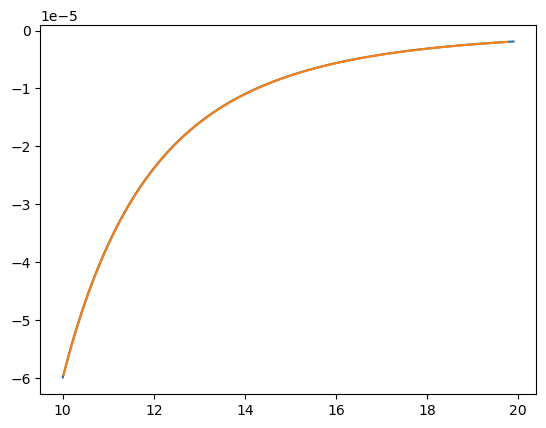

In [66]:
dom1 = np.arange(10, 20, 0.1)
ran1 = [interpFUN([[ev, qv, i]]) for i in dom1]
dom2 = UnifiedDataFrame[(UnifiedDataFrame["q"]==qv)&(UnifiedDataFrame["e"]==ev)]["p"].values
ran2 = UnifiedDataFrame[(UnifiedDataFrame["q"]==qv)&(UnifiedDataFrame["e"]==ev)]["Einf"].values
plt.plot(dom1,ran1)
plt.plot(dom2[170:223], ran2[170:223])

In [86]:
dom1 = np.arange(10, 20, 0.1)
dom2 = np.arange(0.05,0.9, 0.1)
ran1 = [[interpFUN([[j, qv, i]]) for i in dom1] for j in dom2]


e_grid = np.linspace(0.005, 0.9, 1000)
p_grid = np.linspace(6, 20, 1000)
B1, B2 = np.meshgrid(e_grid, p_grid, indexing='xy')
Z = np.zeros((e.size, z.size))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x_predict,y_predict,z_predict, c='r')

LinAlgError: Singular matrix. The matrix of monomials evaluated at the data point coordinates does not have full column rank (3/4).

In [108]:
class tmp():
    def __init__(self, a):
        self.a=a
        print("tmp initiated")
class TMP():
    def __init__(self,b,e):
        self.b=b
        self.e=e
        print("TMP initiated")
        
class tmp1(tmp, TMP):
    def __init__(self, b):
        print("tmp1 initiated")
        tmp.__init__(self,3)
        TMP.__init__(self,7,8)
        
tmp1(5).b

tmp1 initiated
tmp initiated
TMP initiated


7